# Titanic Data Exploration
## by Yahya Al-Balky

## Preliminary Wrangling

This document explores a dataset containing features of exactly 891 Titanic passengers.

In [22]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [23]:
# load in the dataset into a pandas dataframe, print statistics
titanic = pd.read_csv('titanic.csv')

In [24]:
# high-level overview of data shape and composition
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Data Cleaning:

In [26]:
# drop columns irrelevant to the analysis ('PassengerId', 'Name', and 'Ticket')
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [27]:
# drop 'Cabin' column due to it having too many null values (around 77%)
titanic.drop(['Cabin'], axis=1, inplace=True)
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [28]:
# fill missing values in 'Age' and 'Embarked' with median and most-common value
titanic.Age.fillna(titanic.Age.median(), inplace=True)
titanic.Embarked.fillna(titanic.Embarked.value_counts().index[0], inplace=True)
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
# overview of data after cleaning
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [30]:
# descriptive statistics for numeric variables
print(titanic.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


### What is the structure of your dataset?

There are 891 passengers in the dataset with 8 features:
- Survived: wether the passenger survived (1) or not (0)
- Pclass: the ticket class (1 = upper class, 2 = middle class, 3 = lower class)
- Sex: male or female
- Age: age in years
- SibSp: number of siblings/spouses aboard the Titanic
- Parch: number of parents/children aboard the Titanic
- Fare: passenger fare
- Embarked: port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting wether the passenger survived or not.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that sex will have a strong effect on wether the passenger survived or not, where female passengers might have higher survival rate than male passengers. I also think that the ticket class (Pclass) and fare will have effects on survival rate, where upper and middle class passengers might have higher survival rates than low class ones, and a correlation between fare and survival rate might be present.


## Univariate Exploration

I'll start by looking at the main variable of interest: survival, in order to see if our data is balanced or not.

Values' Percentages:
0    0.616162
1    0.383838
Name: Survived, dtype: float64


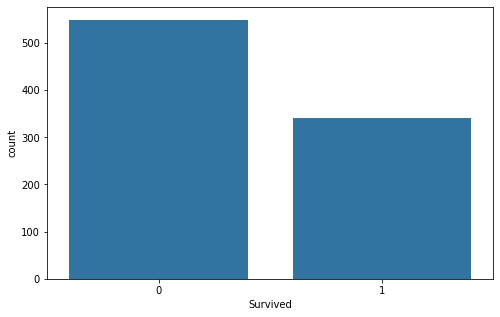

In [31]:
default_color = sb.color_palette()[0]
plt.figure(figsize=[8, 5])

def barplot(feature, hue=None):
    ''' function for plotting categorical variables and printing their values' percenteges '''
    sb.countplot(data=titanic, x=feature, color=default_color, hue=hue)
    plt.xlabel(feature)
    print("Values' Percentages:")
    if hue == None:
        print(titanic[feature].value_counts(normalize=True))
    else:
        print(titanic[[feature, hue]].value_counts(normalize=True, sort=False))

barplot('Survived')

Our data is un-balanced (only ~38% survived).

Next up, the first predictor variable of interest: sex.

Values' Percentages:
male      0.647587
female    0.352413
Name: Sex, dtype: float64


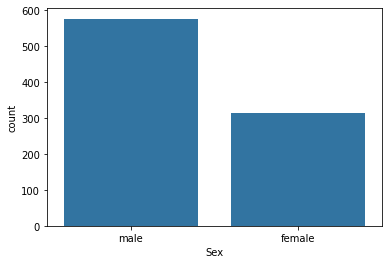

In [32]:
barplot('Sex')

Most of the passengers are males (about 65%).

Moving on to the next predictor variable of interest: Pclass.

Values' Percentages:
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


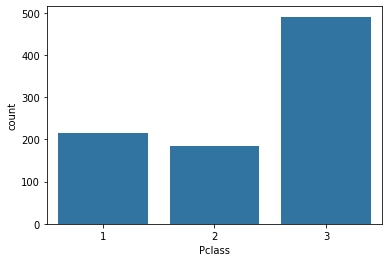

In [33]:
barplot('Pclass')

Most of the passengers are from the lower class (about 55%), followed up by the upper class (about 24%), then the middle class (about 21%).

Moving on to our third predictor variable of interest: Fare.

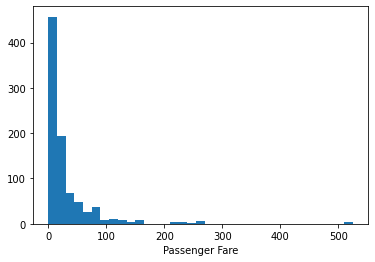

In [34]:
# start with a standard-scaled plot
binsize = 15
bins = np.arange(0, titanic['Fare'].max()+binsize, binsize)

plt.hist(data=titanic, x='Fare', bins=bins)
plt.xlabel('Passenger Fare');

In [35]:
# there seem to be some outliers in our data
titanic[titanic.Fare > 500]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C


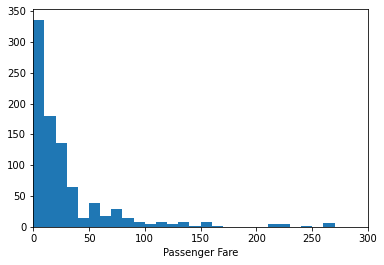

In [36]:
# lets remove the outliers and re-plot
titanic = titanic[titanic.Fare < 500]

binsize = 10
bins = np.arange(0, titanic['Fare'].max()+binsize, binsize)
plt.hist(data=titanic, x='Fare', bins=bins)
plt.xlabel('Passenger Fare')
plt.xlim(0, 300);

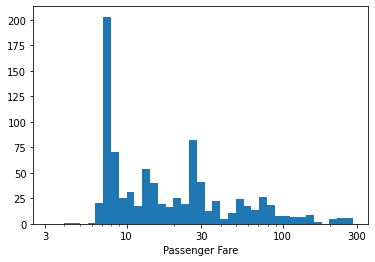

In [37]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(0.5, np.log10(titanic['Fare'].max())+log_binsize, log_binsize)

plt.hist(data=titanic, x='Fare', bins=bins)
plt.xscale('log')
plt.xticks([3, 10, 30, 100, 300], ['3', '10', '30', '100', '300'])
plt.xlabel('Passenger Fare');

Passenger fare has a long-tailed distribution, with a lot of passengers on the low-fare end, and few on the high-fare end. When plotted on a log-scale, the fare distribution looks roughly bi-modal, with one peak between 6 and 10, and a second peak little below 30.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The fare variable took on a big range of values, so I looked at the data using a log transform. Under the transformation, the data looked bimodal, with one peak between 6 and 10, and another just below 30.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the fare variable, a number of outlier points were identified. For safety, all of these points were removed from the dataset to move forwards.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

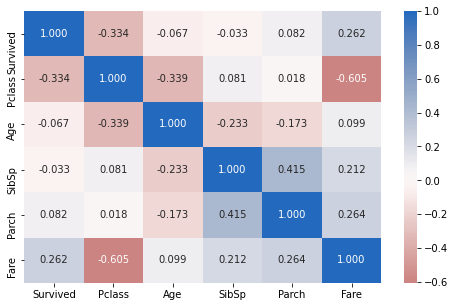

In [38]:
# correlation plot
plt.figure(figsize=[8, 5])
sb.heatmap(titanic.corr(), annot=True, fmt='.3f',
           cmap='vlag_r', center=0);

As would be expected, 'Fare' and 'Pclass' are highly negatively correlated with each other, as there is an obvious relation between being from a higher class and paying more for better service. Both of these variables are also correlated with 'Survived' as previously expected.

There also exists a positive correlation between 'Parch' (# of parents/children aboard the Titanic) and 'SibSp' (# of siblings/spouses aboard the Titanic), which logically makes sense.

Let's move on to looking at how 'Survived' correlates with 'Sex'.

Values' Percentages:
Sex     Survived
female  0           0.091216
        1           0.261261
male    0           0.527027
        1           0.120495
dtype: float64


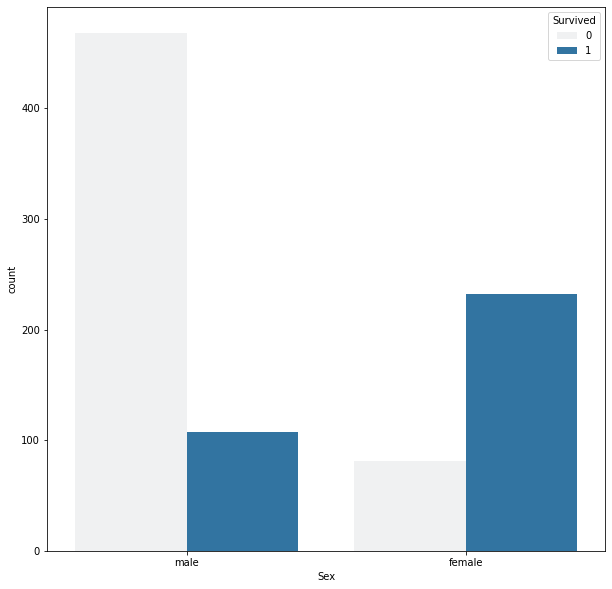

In [39]:
plt.figure(figsize=[10, 10])
barplot('Sex', hue='Survived')

As was expected, the survival rate among females is way higher than among males (only about 25% of the males survived, while about 65% of the females survived!).

Finally, lets check out if there exits a relation between 'Sex' and 'Fare' to see if one genders paid more than the other.

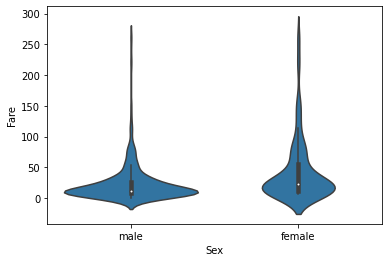

In [40]:
sb.violinplot(x=titanic.Sex, y=titanic.Fare, color=default_color);

The fare distribution for female passengers seems to be less heavy-tailed than that for the male ones, where male passengers are more concentrated at the low-fare range.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We observed a correlation between both 'Fare' and 'Pclass' and our feature of interest 'Survived' as previously expected, with a higher correlation coefficient in the case of 'Pclass'. We also observed a very strong relationship between 'Sex' and the probability of survival, which was much higher in females than in males.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

We observed a positive correlation between 'Parch' (# of parents/children aboard the Titanic) and 'SibSp' (# of siblings/spouses aboard the Titanic), which is a rational result.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the categorical features play into the relationship between the survival rate and sex.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


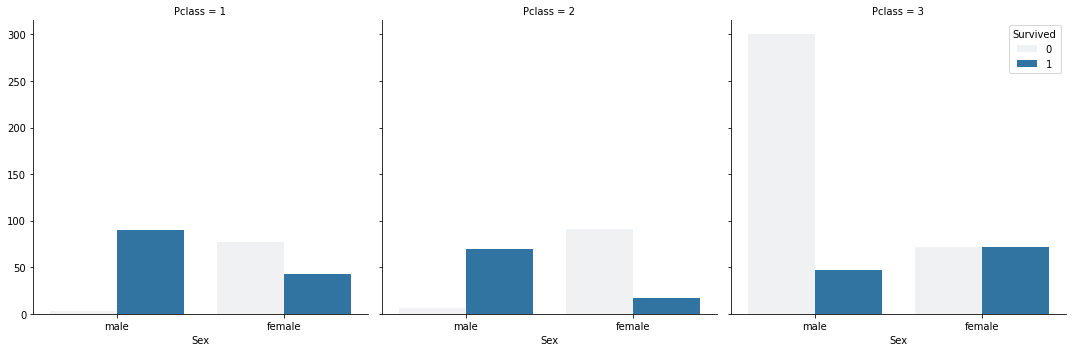

In [41]:
# create faceted clustered bar charts on levels of the Pclass variable
def facet_clusteredbarchart(feature):
    ''' function for plotting categorical features against the relationship between the survival rate and sex '''
    g = sb.FacetGrid(data=titanic, col=feature, size=5)
    g.map(sb.countplot, 'Sex', hue=titanic.Survived)
    plt.legend(title='Survived');

facet_clusteredbarchart('Pclass')

Interestingly, the survival rate among males was actually higher than females for passengers from upper and middle classes, while it was so much lower than females for passengers from the lower class.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


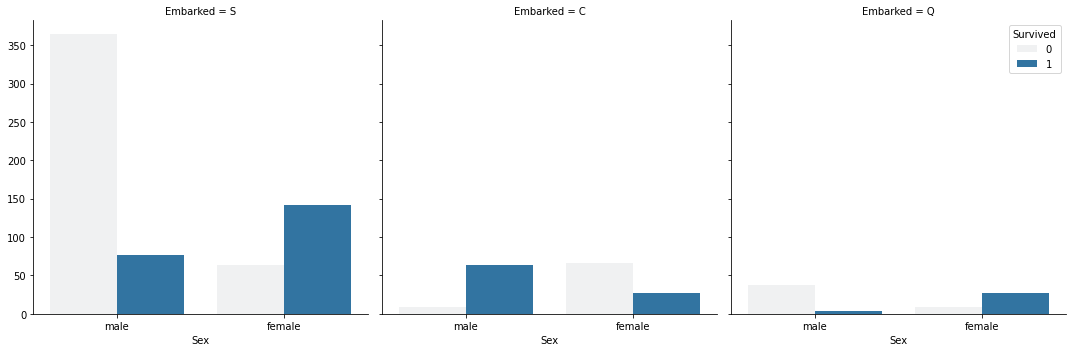

In [42]:
facet_clusteredbarchart('Embarked')

Seems like the high female survival rate in comparison to males is only present in passengers that embarked from Southampton and Queentown, while it is actually the opposite for passengers that embarked from Cherbourg (higher survival rate among males).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of the survival rates against sex in this section by looking at the impact of the categorical features. The multivariate exploration here showed that both our categorical features ('Pclass' and 'Embarked') had a signigicant effect on the relationship between sex and the survival rates that we observed earlier.

### Were there any interesting or surprising interactions between features?

The interaction between the passengers' class and sex against survival rates was indeed very interesting, where we discovered that our previously stated result of higher survival rates among females in comparison to males only applies for passengers from the lower class.

The interaction between the port the passengers embarked from and sex against survival rates was also quite surprising, where our assumption of higher survival rates among females in comparison to males doesn't seem to apply for passengers that embarked from Cherbourh.